In [ ]:
import urllib.request

In [ ]:
urllib.request.urlretrieve('https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fi.ytimg.com%2Fvi%2FI9JvDaciaFk%2Fmaxresdefault.jpg&f=1&nofb=1', 'img.jpg')

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [51]:
def show_with_plt(image):
    plt.figure(figsize = (30, 30))
    plt.imshow(image)
    plt.xticks([]), plt.yticks([])
    plt.show()

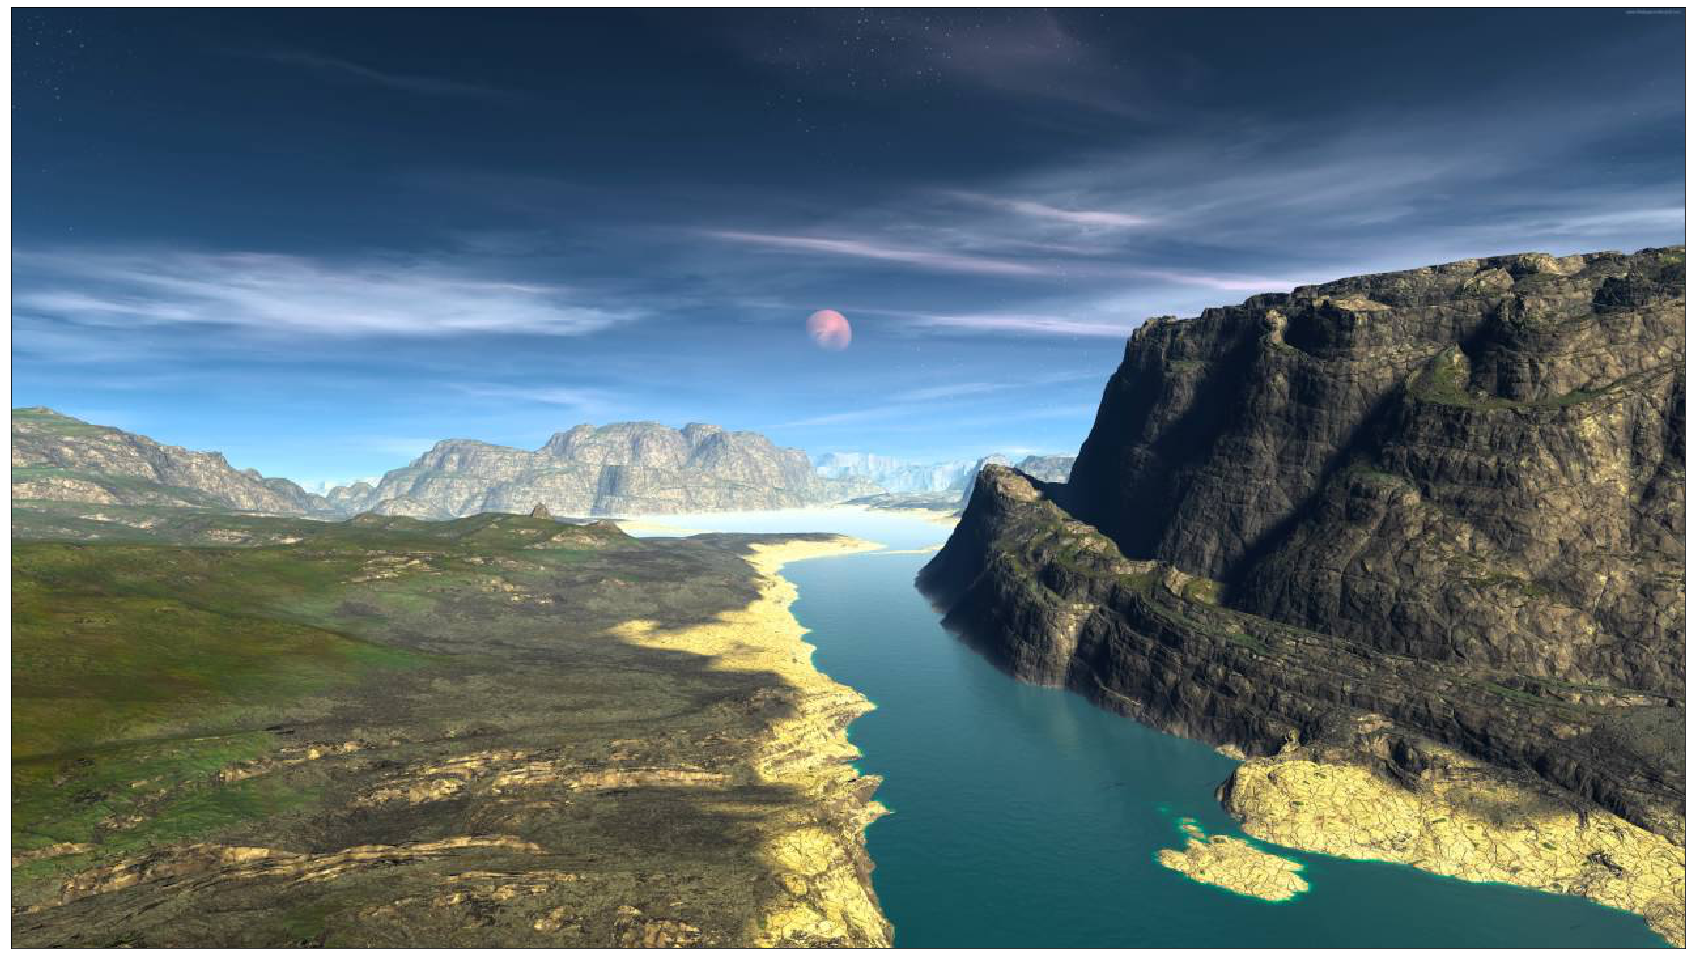

In [52]:
img = cv2.imread('img.jpg')
img_h, img_w, img_z = img.shape

b = img[0 : img_h, 0 : img_w, 0].copy()
r = img[0 : img_h, 0 : img_w, 2]
    
img[0 : img_h, 0 : img_w, 0] = r
img[0 : img_h, 0 : img_w, 2] = b

show_with_plt(img)

In [53]:
img_d2 = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
img_d2_h, img_d2_w, img_d2_z = img_d2.shape
img_d4 = cv2.resize(img, None, fx=0.25, fy=0.25, interpolation=cv2.INTER_AREA)
img_d4_h, img_d4_w, img_d4_z = img_d4.shape

In [54]:
edges = cv2.Canny(img_d2, 100, 200)
edges_1_ch = edges.reshape((img_d2_h, img_d2_w, 1))
edges_ch = np.zeros((img_d2_h, img_d2_w, img_z), np.uint8)
for ch in range(0, img_z):
    edges_ch[0:img_d2_h, 0:img_d2_w, ch:ch+1] = edges_1_ch

averaging = cv2.blur(img_d4, (5, 5))

gaussian = cv2.GaussianBlur(img_d4, (5,5), 0)

kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
kernelled = cv2.filter2D(img_d4, -1, kernel)

random = (np.random.rand(img_d4_h, img_d4_w, 3) * 255).astype(np.uint8)

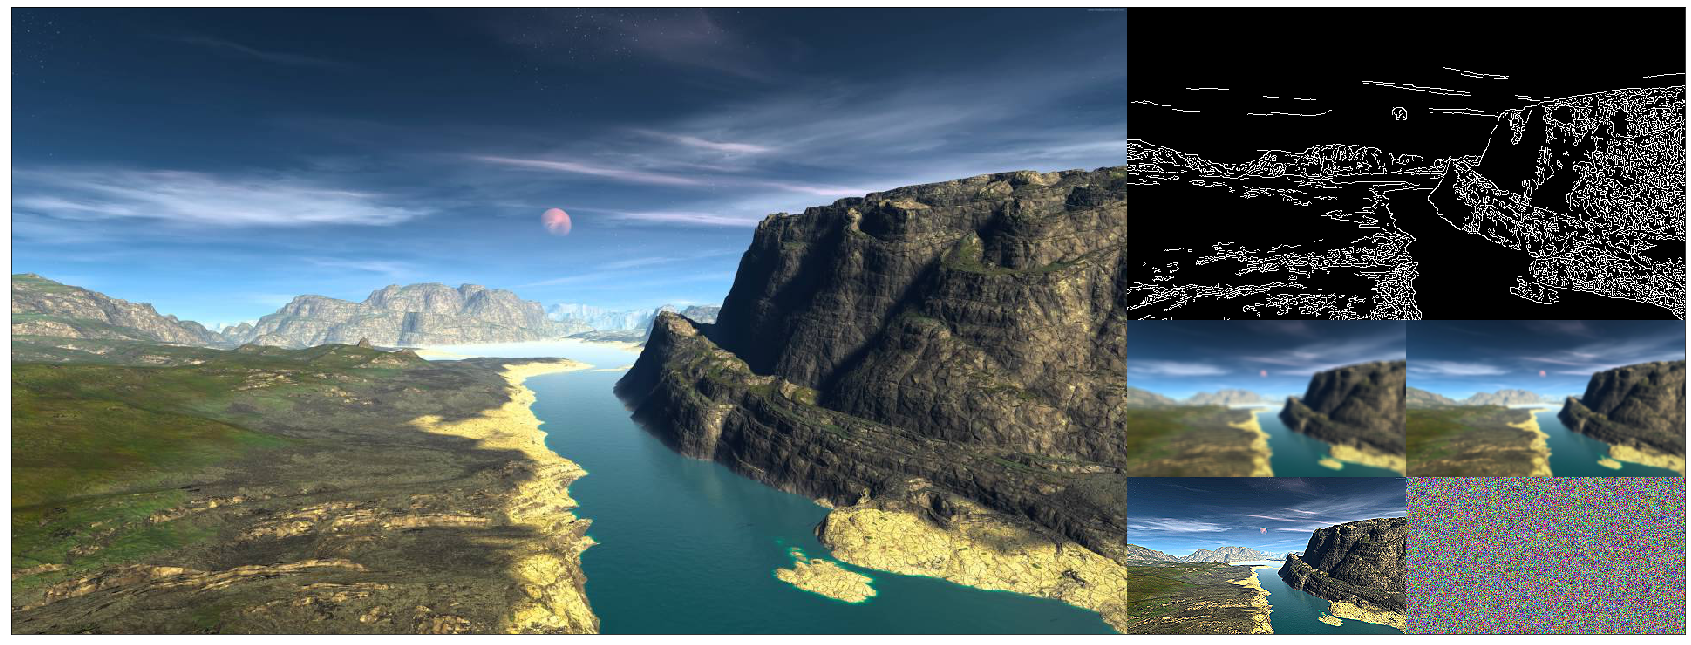

In [55]:
result = np.zeros((img_h, img_w + img_d2_w, img_z), np.uint8)
result[0                   : img_h              , 0                : img_w           ] = img
result[0                   : img_d2_h           , img_w            : img_w + img_d2_w] = edges_ch
result[img_d2_h            : img_d2_h + img_d4_h, img_w            : img_w + img_d4_w] = averaging
result[img_d2_h            : img_d2_h + img_d4_h, img_w + img_d4_w : img_w + img_d2_w] = gaussian
result[img_d2_h + img_d4_h : img_h              , img_w            : img_w + img_d4_w] = kernelled
result[img_d2_h + img_d4_h : img_h              , img_w + img_d4_w : img_w + img_d2_w] = random
show_with_plt(result)

In [56]:
cv2.imwrite('result.jpg', result)

True